'The value domains do not intersect and are incoherent'

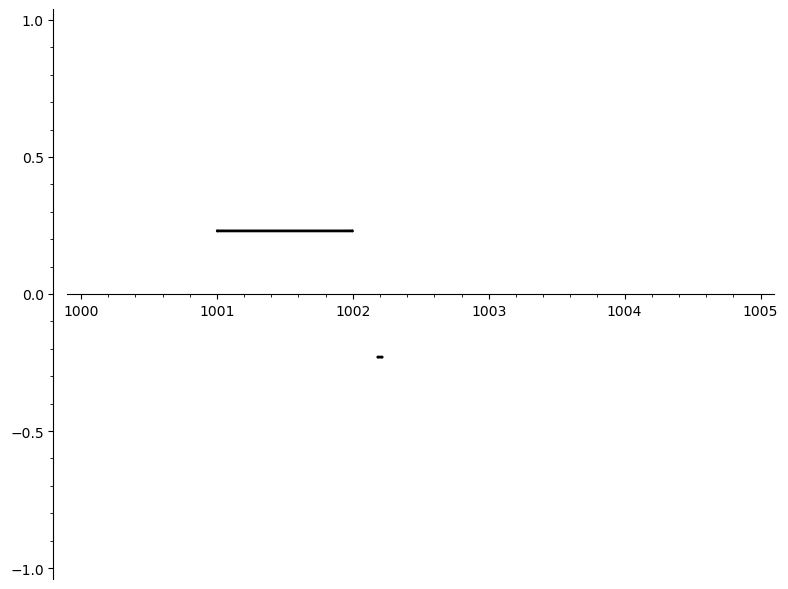

In [73]:
#TODO
#Make auto scale work
#Remove y axis from view
#Mode for non-domain values
#Allow selection of domain - x axis - domain or domain - domain -x axis orders
#Allow selection of arrow ends
#Add labels for intersected
#support scientific numbers
#fix = in the labels

#Defining the start and end values for the values' domains
s1 = 1000.98
e1 = 1002.02
s2 = 1002.192
e2 = 1002.208

#Defining the units and value name
units = "Ω"
val_name = "R"
decimal_divide = ","

#Defining the colors of the value domains, intersection domain and text
h_color = "black"
v_color = "grey"
d_color = "grey"
t_color = "black"

#Arrows for each domain to be displayed
v1 = arrow((s1, height_dist), (e1, height_dist), arrowsize=head_size, head=2, color=h_color)
v2 = arrow((s2, -height_dist), (e2, -height_dist), arrowsize=head_size, head=2, color=h_color)

#find span for min max
vals = [s1, e1, s2, e2]
min = s1
max = s1
for i in range(len(vals)-1):
    i+= 1
    n = vals[i]
    if max < n:
        max = n
    if min > n:
        min = n

#Parameters that will autotune themselves eventually
frame_width = (max - min)
frame_height = (max - min) * 9 / 16
height_dist = frame_height / 3
head_size = height_dist / 10

#Make centering frame
#cf1 = point([min, frame_height / 2], color="white")
#cf2 = point([max, frame_height / 2], color="white")
#cf3 = point([min, -frame_height / 2], color="white")
#cf4 = point([max, -frame_height / 2], color="white")

c1 = ([min - ((max - min) / 5), frame_height / 2])
c2 = ([max + ((max - min) / 5), -frame_height / 2])
c3 = ([min - ((max - min) / 5), frame_height / 2])
c4 = ([max + ((max - min) / 5), -frame_height / 2])

frame = polygon([c1, c2, c3, c4], color=d_color, alpha=0.4)

#Flip inverted domains
if s1 > e1:
    temp = s1
    s1 = e1
    e1 = temp
    show("Inverted domain 1")
elif s2 > e2:
    temp = s2
    s2 = e2
    e2 = temp
    show("Inverted domain 2")

#Find included start and end values to determine domain intersection
intersect = []
if s1 >= s2 and s1 <= e2:
    intersect.append(s1)
    print(s1)
if e1 >= s2 and e1 <= e2:
    intersect.append(e1)
    print(e1)
if len(intersect) < 2 and s2 >= s1 and s2 <= e1:
    intersect.append(s2)
    print(s2)
if len(intersect) < 2 and e2 >= s1 and e2 <= e1:
    intersect.append(e2)
    print(e2)

#Remove trailing zeros
def detrail(n) :
    num = str(n).split(".")
    output_num = ""
    for i in range(len(num[1])-1, 0, -1):
        if num[1][i] != "0":
            for j in range(i+1):
                output_num += num[1][j]
            return str(num[0]) + decimal_divide + str(output_num)
    
#if an intersection exists, display the graph with intersection highlighted and dotted lines
#otherwise notify user and display the domains on the graph
if len(intersect) == 2:

    p1 = ([intersect[0], height_dist])
    p2 = ([intersect[0], -height_dist])
    p3 = ([intersect[1], -height_dist])
    p4 = ([intersect[1], height_dist])
    
    l1 = line([(intersect[0], height_dist), (intersect[0], -height_dist)], linestyle='dashed', color=v_color)
    l2 = line([(intersect[1], -height_dist), (intersect[1], height_dist)], linestyle='dashed', color=v_color)
    a = polygon([p1, p2, p3, p4], color=d_color, alpha=0.4)

    val_name += " = "
    t1 = text(val_name + str(s1) + units, (s1 + s1/50, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="bottom")
    t2 = text(val_name + str(e1) + units, (e1 + e1/50, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="bottom")
    t3 = text(val_name + str(s2) + units, (s2 - s2/50, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="top")
    t4 = text(val_name + str(e2) + units, (e2 - e2/50, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="top")
    
    show(v1 + v2 + l1 + l2 + a + t1 + t2 + t3 + t4 + frame)
         
elif len(intersect) == 1:

    print(intersect[0])

else:
    show("The value domains do not intersect and are incoherent")
    
    val_name += " = "
    t1 = text(val_name + detrail(s1) + units, (s1 + s1/50, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="bottom")
    t2 = text(val_name + detrail(e1) + units, (e1 + e1/50, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="bottom")
    t3 = text(val_name + detrail(s2) + units, (s2 - s2/50, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="top")
    t4 = text(val_name + detrail(e2) + units, (e2 - e2/50, -height_dist - height_dist/5), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="top")

    show(v1 + v2, xmin=1000, xmax=1005 , ymin=-1, ymax=1, figsize=8)

In [ ]:
# stub for a mode that takes a single value (like a theoretical one without uncertainty) instead of a second domain
s1 = 30
e1 = 120
s2 = 50
e2 = 100
h_color = "black"
v_color = "grey"
d_color = "grey"
t_color = "black"
val_name = "W"
height = 50
height_dist = 10
b1 = point((0, height))
b2 = point((0, -height))

v1 = arrow((s1, height_dist), (e1, height_dist), head=2, color=h_color)
v2 = arrow((s2, -height_dist), (e2, -height_dist), head=2, color=h_color)

if (e1 - s2) >= 0:
    l1 = line([(e1, height_dist), (e1, -height_dist)], linestyle='dashed', color=v_color)
    l2 = line([(s2, -height_dist), (s2, height_dist)], linestyle='dashed', color=v_color)
    a = polygon([[e1, height_dist], [e1, -height_dist],[s2, -height_dist], [s2, height_dist]], color=d_color, alpha=0.4)

    p1 = text(val_name + " = " + str(e1), (e1 + e1/50, height_dist + height_dist/20), color=t_color, fontsize=10, horizontal_alignment='left', vertical_alignment="bottom")
    p2 = text(val_name + " = " + str(s2), (s2 - s2/50, -height_dist - height_dist/20), color=t_color, fontsize=10, horizontal_alignment='right', vertical_alignment="top")
    p3 = text(val_name + " = " + str(e1), (s1 + s1/50, height_dist + height_dist/5), color=t_color, fontsize=10, horizontal_alignment='center', vertical_alignment="bottom")
    
    show(b1 + b2 + v1 + v2 + l1 + l2 + a + p1 + p2 + p3)
else:
    show("Les valeurs ne partagent pas un domaine et sont incohérentes")
    show(b1 + b2 + v1 + v2 + v12 + v22)